# Исследование продаж компьютерных игр

В распоряжении имеются исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

### Описание данных:

- *Name* — название игры
- *Platform* — платформа
- *Year_of_Release* — год выпуска
- *Genre* — жанр игры
- *NA_sales* — продажи в Северной Америке (миллионы проданных копий)
- *EU_sales* — продажи в Европе (миллионы проданных копий)
- *JP_sales* — продажи в Японии (миллионы проданных копий)
- *Other_sales* — продажи в других странах (миллионы проданных копий)
- *Critic_Score* — оценка критиков (максимум 100)
- *User_Score* — оценка пользователей (максимум 10)
- *Rating* — рейтинг от организации ESRB (англ. Entertainment Software Rating Board)

### 1. Открытие файла и изучение общей информации

---

#### 1.1 Импорт необходимых библиотек

Для начала импортируем все необходимые библиотеки для работы с данными и построением графиков.

In [1]:
import pandas as pd
from scipy import stats as st

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.options.mode.chained_assignment = None

#### 1.2 Изучение общей информации о датафрейме

Считаем данные из файла и запишем их в переменную **`data`**. Путь к файлу с данными: `/datasets/games.csv`.

In [3]:
data = pd.read_csv('datasets/games.csv')

Выведем первые 10 строк датафрейма на экран.

In [4]:
pd.set_option('display.max_columns', None)
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Также выведем основную информацию о датафрейме с помощью метода `info()`.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Заметим, что *6* столбцов имеют тип **float64** и *5* столбцов тип **object**. Также присутствуют пропуски в некоторых столбцах, и общее количество строк в датафрейме равняется *16715*. Для более удобной работы с датафреймом в дальнейшем приведем все названия столбцов к нижнему регистру.

**Вывод:**

Первоначально изучив общую информацию об исходном датафрейме, далее можно переходить к его предобработке.

### 2. Предобработка данных

---

#### 2.1 Преобразование названий столбцов

Приведем названия всех столбцов к нижнему регистру для удобства работы с датафреймом в дальнейшем.

In [6]:
data.columns = data.columns.str.lower()

Проверим, что названия всех стоблцов заданы исключительно в нижнем регистре.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Поскольку названия всех столбцов написаны в одном стиле, удобном для работы с ними, то можно приступить к дальнейшей предобработке датафрейма.

#### 2.2 Обработка пропусков в данных

Займемся обработкой пропусков в данных. Выведем количество пропущенных значений для каждого столбца.

In [8]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Заметим, что наибольшее количество пропусков оказалось в столбцах `critic_score`, `user_score` и `rating`.

Также малое количество пропусков присутствует в столбцах `name`, `year_of_release`, `genre`. Удалим строки с пропусками в этих столбцах, поскольку восстановить их не предоставляется возможным.

In [9]:
data = data.dropna(subset=['name', 'year_of_release', 'genre'])

Для столбцов `critic_score`, `user_score` и `rating` процент пропущенных данных от общего объема датафрейма составляет в среднем 44%. Замену пропусков в данных столбцах на любую величину выполнять не стоит, поскольку это может исказить итоговый результат.

Убедимся, что пропуски для остальных столбцов отсутствуют.

In [10]:
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

Также стоит отметить, что пропуски могли быть обусловлены некачественным собром данных, технической ошибкой или человеческим фактором.

#### 2.3 Изменение типов данных

Преобразуем данные в нужные типы. Для начала изменим тип данных у столбца `year_of_release` на **int64** для более удобной работы с ним.

In [11]:
data = data.astype({'year_of_release' : 'int64'})

Заметим, что в столбце `user_score` есть значения **tbd** *(to be determined)*. Изменим тип данных столбца с **object** на **float64** и заодно обработаем эти значения при помощи функции `to_numeric()`, задав значение аргумента `errors='coerce'`, который принудительно заменяет некорректные значения на NaN. 

In [12]:
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')

Проверим, что типы данных поменялись.

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


#### 2.4 Обработка дубликатов

##### 2.4.1 Проверка на наличие явных дубликатов

Проверим исходный датафрейм на наличие явных строк-дубликатов.

In [14]:
data.duplicated().sum()

0

Нетрудно заметить, что явных дубликатов в исходной выборке данных нет.

##### 2.4.2 Проверка на наличие неявных дубликатов

Также проверим наш датафрейм на наличие неявных дубликатов для столбцов `name`, `genre`, `platform`, `year_of_release`.

In [15]:
data.duplicated(subset=['name', 'genre', 'platform', 'year_of_release']).sum()

1

Заметим, что нашелся один такой дубликат, избавимся от него.

In [16]:
data.drop_duplicates(subset=['name', 'genre', 'platform', 'year_of_release'])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


#### 2.5 Добавление столбцов

Добавим в исходный датафрейм столбец, который будет показывать суммарные продажи игр во всех регионах.

In [17]:
data['all_region_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

Проверим, что столбец добавился.

In [18]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_region_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


**Вывод:**

Преобразовав названия столбцов, обработав пропуски в данных, изменив, где необходимо, тип данных, обработав дубликаты и добавив информативный столбец, далее можно перейти к исследовательскому анализу данных для выявления основных зависимостей, оказывающих влияние на продажи.

### 3. Исследовательский анализ данных

---

После предобработки исходного датафрейма и добавления необходимого информативного столбца займемся исследовательским анализом.

Графики будем строить при использовании библиотеки `Seaborn`. Зададим тему и общий стиль для всех графиков.

In [19]:
sns.set_theme(style='darkgrid', palette='Set2')

#### 3.1 Объем выпущенных игр за разные периоды времени

Построим гистограмму, показывающую распределение количества проданных игр по годам.

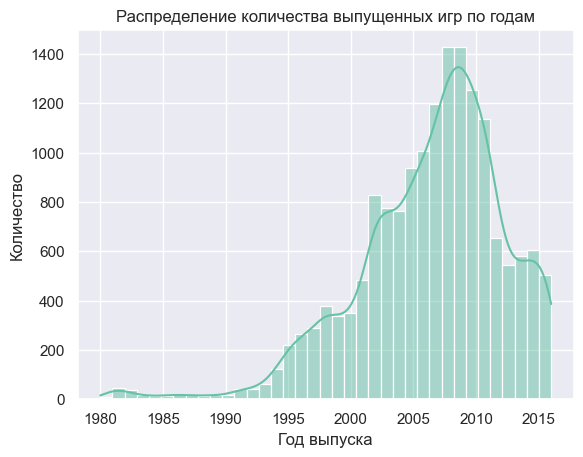

In [20]:
sns.histplot(data=data, x='year_of_release', bins=37, kde=True)
plt.xlabel('Год выпуска')
plt.ylabel('Количество')
plt.title('Распределение количества выпущенных игр по годам');

Нетрудно заметить, что активная разработка игр началась с 1995 года и в следующие 15 лет количество выпущеных игр в год только увеличивалось. Однако, с 2010 года наблюдается уменьшение количества выпущенных игр. Это может быть связано с тем, что с этого года разрабатывались более сложные продукты, требующие гораздо больше времени на разработку.

Исходя из полученной гистограммы, можно сделать вывод, что данные до 1995 года можно отбросить.

#### 3.2 Объемы продаж по платформам

Рассмотрим продажи по платформам. Для этого сначала найдем платформы с наибольшими суммарными продажами при помощи группировки данных в сводную таблицу.

In [21]:
platform_count = data.pivot_table(index='platform', values='name', aggfunc={'count'}).sort_values('count', ascending=False)
platform_count.columns = ['Количество продаж']

platform_count.head(10)

,Количество продаж
platform,
PS2,2127
DS,2121
PS3,1306
Wii,1286
X360,1232
PSP,1193
PS,1190
PC,957
GBA,811


Наибольшее количество игр за весь рассматриваемый период было продано на платформах **PS2**, **DS** и на **PS3**. Посмотроим распределение проданных игр на этих платформах по годам.

##### 3.2.1 Продажи по платформе PS2

Для начала рассмотрим платформу, на которую было продано наибольшее колчичество игр – **PS2**. Построим гистограмму распределения продаж по годам для этой платформы.

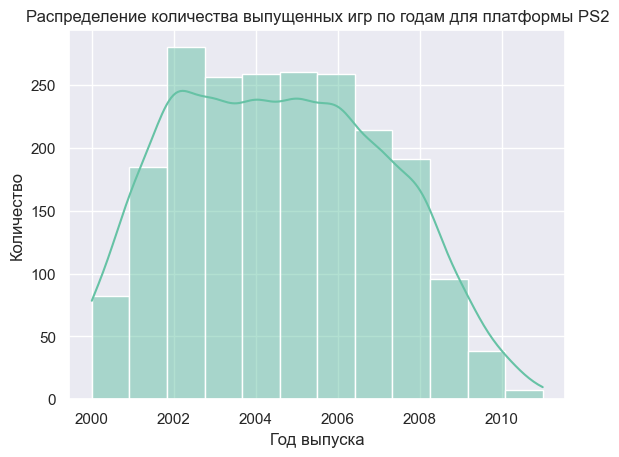

In [22]:
data_ps2 = data[data['platform'] == 'PS2']

sns.histplot(data=data_ps2, x='year_of_release', bins=12, kde=True)
plt.xlabel('Год выпуска')
plt.ylabel('Количество')
plt.title('Распределение количества выпущенных игр по годам для платформы PS2');

Поскольку данная платформа вышла на рынок в 2000 году, то и данные по продажам игр начинаются с этого же года. Нетрудно заметить, что с течением времени наблюдался рост по продажам вплоть до 2006 года. Далее начался спад, и в 2011 году объем продаж по данной платформе оказался минимален. Это может быть связано с выходом более новой версии игровой платформы.

##### 3.2.2 Продажи по платформе DS

Далее перейдем к рассмотрению платформы **DS**.

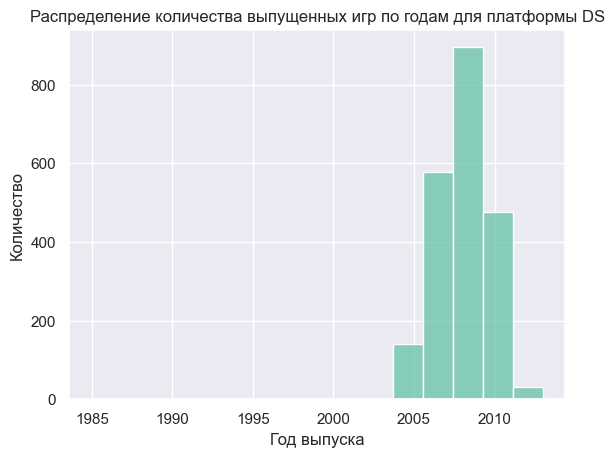

In [23]:
data_ds = data[data['platform'] == 'DS']

sns.histplot(data=data_ds, x='year_of_release', bins=15)
plt.xlabel('Год выпуска')
plt.ylabel('Количество')
plt.title('Распределение количества выпущенных игр по годам для платформы DS');

Рассмотрим уникальные значения для столбца `year_of_release` на наличие выбросов.

In [24]:
data_ds['year_of_release'].sort_values().unique()

array([1985, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013])

Заметим, что 1985 год явно выбивается из общей массы значений. Уберем этот выброс и еще раз построим гистограмму.

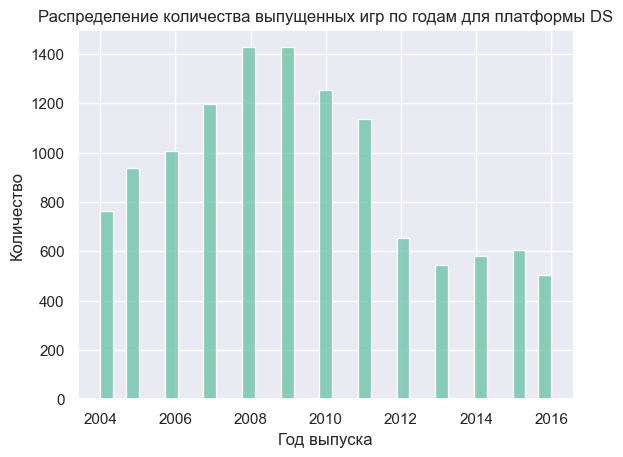

In [25]:
data_ds = data[data['year_of_release'] >= 2004]

sns.histplot(data=data_ds, x='year_of_release')
plt.xlabel('Год выпуска')
plt.ylabel('Количество')
plt.title('Распределение количества выпущенных игр по годам для платформы DS');

Продажи игр на платформе **DS** стартовали в 2004 году и вплоть до 2009 года наблюдался их рост. Далее произошел спад в продажах и их стабилизация на определенном уровне за последние годы.

##### 3.2.3 Продажи по платформе PS3

Построим гистограмму распределения по продажам игр по годам для игровой платформы **PS3**.

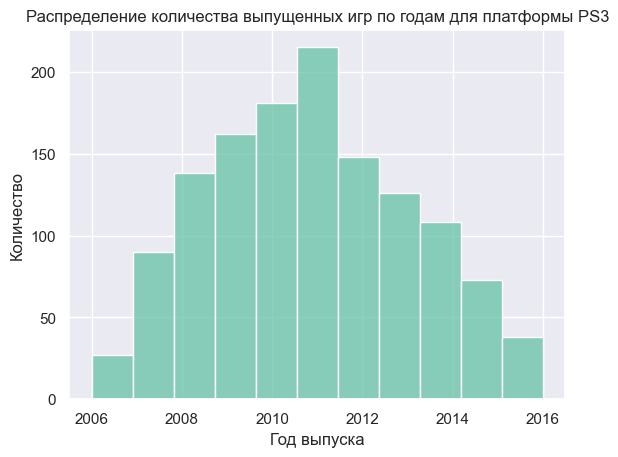

In [26]:
data_ps3 = data[data['platform'] == 'PS3']

sns.histplot(data=data_ps3, x='year_of_release', bins=11)
plt.xlabel('Год выпуска')
plt.ylabel('Количество')
plt.title('Распределение количества выпущенных игр по годам для платформы PS3');

Рост по продажам игр на платформе **PS3** начался с 2006 года и продолжился до 2011. Если сопоставить полученные данные с гистограммой по продажам для платформы **PS2**, то можно заметить следующее:

*Спад в продажах для платформы PS2 напрямую связан с началом продаж игр для платформы PS3*.

Основываясь на данные для трех игровых платформ с наибольшим количеством продаж по играм, можно сделать вывод о средней длительности жизни платформы. В качестве примера посчитаем срок жизни для консоли **PS3**. Выведем для нее значения годов, в которые осуществлялась продажа игр.

In [27]:
data_ps3['year_of_release'].sort_values().unique()

array([2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016])

Рассчитаем среднюю продолжительность жизни для всех игровых платформ.

In [28]:
platform_live_sum = 0

for value in data['platform'].unique():
    platform_live_sum += data[data['platform'] == value]['year_of_release'].max() - data[data['platform'] == value]['year_of_release'].min()
    
platform_mean = platform_live_sum / len(data['platform'].unique())

print('Средний срок жизни по всем платформам составляет', platform_mean)

Средний срок жизни по всем платформам составляет 7.612903225806452


Исходя из полученного результата примем, что средняя длительность жизни игровой платформы составляет приблизительно **10 лет**.

#### 3.3 Оценка прибыльности платформ

В данном разделе оценим потенциально прибыльные платформы. Эти данные помогут сделать прогноз по продажам на 2017 год.

Для этого возьмем данные за актуальный период (за последние 3 года).

In [29]:
data_actual = data[data['year_of_release'] >= 2014]

В качестве основного показателя будем рассматривать продажи по всем регионам (столбец `all_region_sales`). Выведем данные по продаже в виде сводной таблицы.

In [30]:
data_actual_sales = data_actual.pivot_table(index='platform', values='all_region_sales', aggfunc={'sum'}).sort_values('sum', ascending=False)
data_actual_sales.columns = ['Cуммарные продажи']

data_actual_sales

,Cуммарные продажи
platform,
PS4,288.15
XOne,140.36
3DS,86.68
PS3,68.18
X360,48.22
WiiU,42.98
PC,27.05
PSV,22.40
Wii,5.07


Заметим, что в последние три года наиболее популярными игровыми платформами оказались **PS4**, **XOne** и **3DS**. Это консоли последнего поколения. Далее за ними следуют консоли предыдущего поколоения: **PS3**, **X360** и **WiiU**. И только за ними следует **PC**. Такая тенденция выглядит вполне логичной.

Убедимся, что 3 первых игровых платформы являются потенциально прибыльными, построим для них гистограммы.

Для начала рассмотрим продажи для платформы **PS4**.

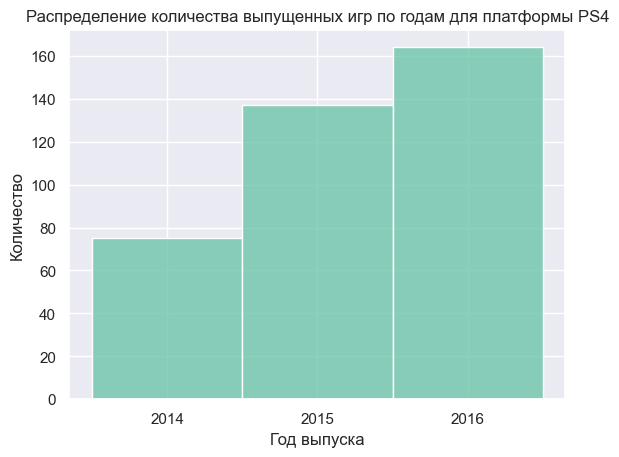

In [31]:
data_actual_ps4 = data_actual[data_actual['platform'] == 'PS4']

sns.histplot(data=data_actual_ps4, x='year_of_release', bins=3, discrete=True)

plt.xticks(data_actual_ps4['year_of_release'].unique()) # код ревьюера
 
plt.xlabel('Год выпуска')
plt.ylabel('Количество')
plt.title('Распределение количества выпущенных игр по годам для платформы PS4');

Заметим, что для этой платформы наблюдается тенденция роста продаж.

Теперь рассмотрим **XOne**.

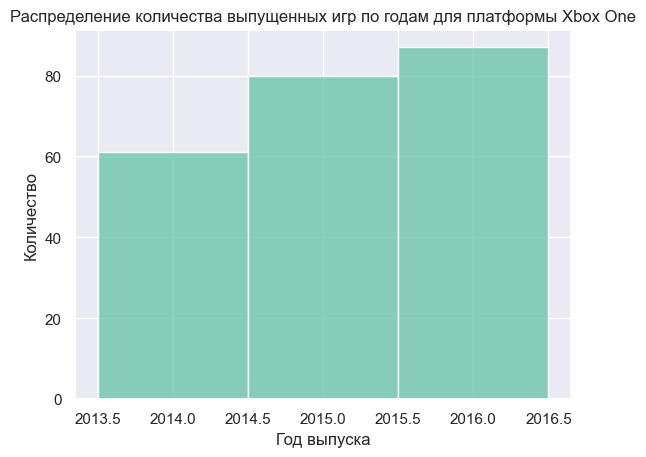

In [32]:
data_actual_xone = data_actual[data_actual['platform'] == 'XOne']

sns.histplot(data=data_actual_xone, x='year_of_release', bins=3, discrete=True)
plt.xlabel('Год выпуска')
plt.ylabel('Количество')
plt.title('Распределение количества выпущенных игр по годам для платформы Xbox One');

Для платформы **XOne** также наблюдается рост продаж игр за последние 4 года.

И оценим платформу **3DS**.

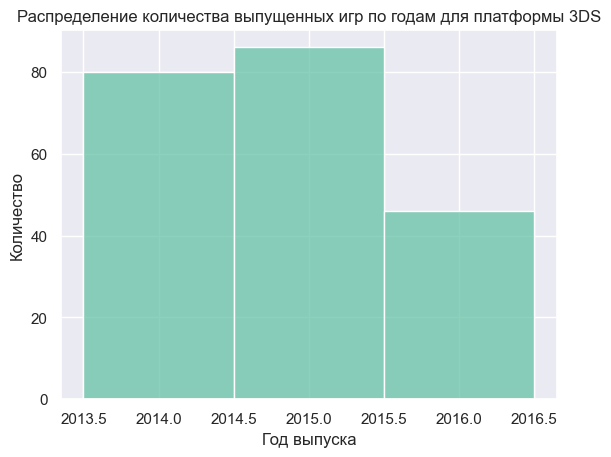

In [33]:
data_actual_3ds = data_actual[data_actual['platform'] == '3DS']

sns.histplot(data=data_actual_3ds, x='year_of_release', bins=3, discrete=True)
plt.xlabel('Год выпуска')
plt.ylabel('Количество')
plt.title('Распределение количества выпущенных игр по годам для платформы 3DS');

Однако, для платформы **3DS** наблюдается резкий спад в продажах с 2015 по 2016 год. Данная платформа не может считаться потенциально прибыльной, а скорее наоборот вполне вероятно, что объем продаж в 2017 году для нее еще больше уменьшится.

Дополнительно рассмотрим **PC**.

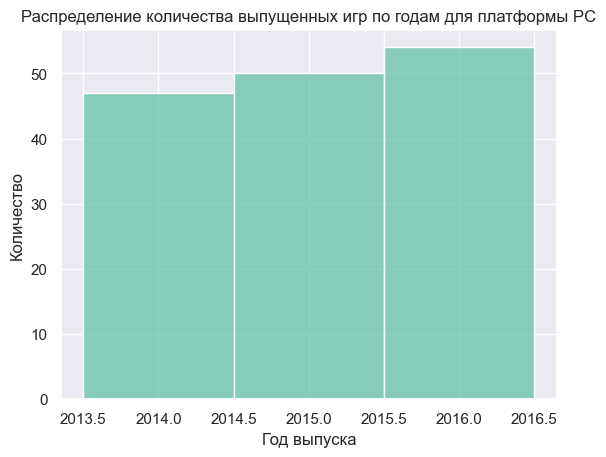

In [34]:
data_actual_pc = data_actual[data_actual['platform'] == 'PC']

sns.histplot(data=data_actual_pc, x='year_of_release', bins=3, discrete=True)
plt.xlabel('Год выпуска')
plt.ylabel('Количество')
plt.title('Распределение количества выпущенных игр по годам для платформы PC');

Для платформы **PC** наблюдается более плавный рост в продажах по сравнению с **PS4** и **XOne**, но данная тенденция также позволяет сделать вывод о потенциале данной платформы.

#### 3.4 Оценка глобальных продаж по платформам

Оценим суммарные продажи игр по платформам. Возьмем актуальные данные по продажам для платформ PS4, 3DS, XOne и PC. Построим график типа **boxplot** для более наглядного представления.

Отфильтруем данные по эти четырем платформам.

In [35]:
actual_platforms = ['PS4', '3DS', 'XOne', 'PC']

data_actual_platforms = data_actual.query('platform in @actual_platforms')

И построим графики.

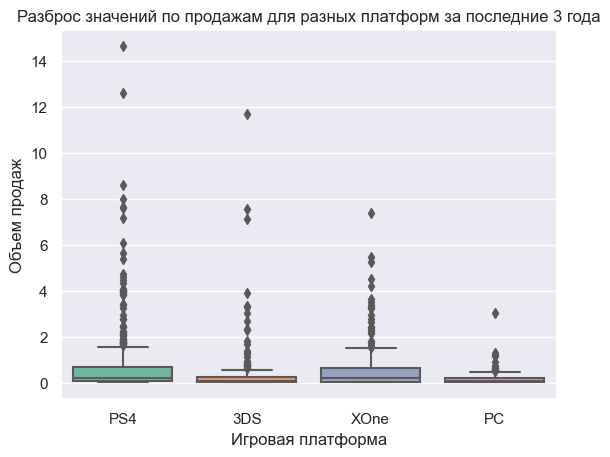

In [36]:
sns.boxplot(data=data_actual_platforms, x='platform', y='all_region_sales')

plt.xlabel('Игровая платформа')
plt.ylabel('Объем продаж')
plt.title('Разброс значений по продажам для разных платформ за последние 3 года');

Заметим, что для платформы **PS4** наблюдается достаточно большое количество выбросов по сравнению с его конкурентами. Для оценки средних значений по продажам зададим ограничение для оси *y*.

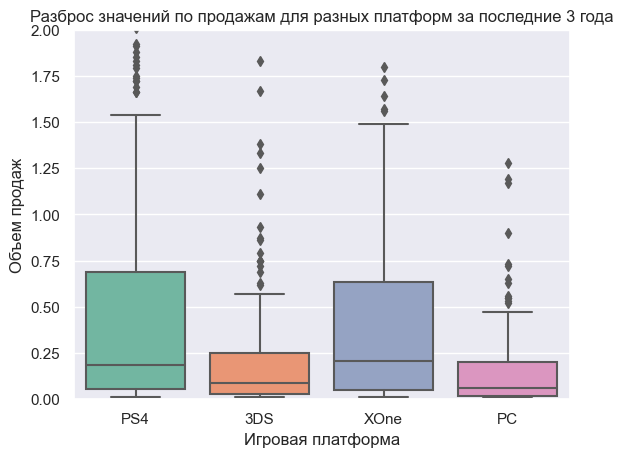

In [37]:
sns.boxplot(data=data_actual_platforms, x='platform', y='all_region_sales')

plt.ylim(0, 2)
plt.xlabel('Игровая платформа')
plt.ylabel('Объем продаж')
plt.title('Разброс значений по продажам для разных платформ за последние 3 года');

Показатели суммарного объема по продажам для **PS4** и **XOne** имеют схожий вид и средние значения. Однако некоторые отдельные значения по платформе **PS4** значительно превышают показатели его прямого конкурента.

При сравнении **3DS** и **PC** видно, что у первой платформы средние показатели оказываются немного выше. При этом также количество "выбросов" для первой платформы оказывается больше.

Эти данные напрямую могут указывать на распределение популярности среди игровых платформ.

#### 3.5 Влияние оценок пользователей и критиков на продажи

В данном разделе необходимо будет оценить влияние столбцов `user_score` и `critic_score` на объемы продаж. Будем рассматривать популярные игровые платформы исходя из актуальных данных, полученных ранее.

Напишем функцию, позволяющую строить необходимые графики и считать корреляцию между изучаемыми столбцами.

In [38]:
def score_influence(data, name):
    # построение первого графика
    sns.scatterplot(data=data, x='critic_score', y='all_region_sales')
    plt.title('Зависимость объема продаж от оценки критиков для платформы ' + name)
    plt.xlabel('Оценка критиков')
    plt.ylabel('Объем продаж')
    plt.show()
    
    # расчет корреляции между столбцами
    print("Коэффициент корреляции между столбцами critic_score и all_region_sales:", data['critic_score'].corr(data['all_region_sales']))
    
    # построение второго графика
    sns.scatterplot(data=data, x='user_score', y='all_region_sales')
    plt.title('Зависимость объема продаж от оценки пользователей для платформы ' + name)
    plt.xlabel('Оценка пользователей')
    plt.ylabel('Объем продаж')
    plt.show()
    
    # расчет корреляции между столбцами
    print("Коэффициент корреляции между столбцами user_score и all_region_sales:", data['user_score'].corr(data['all_region_sales']))

##### 3.5.1 Оценка влияния показателей для платформы PS4

Рассмотрим одну из популярных игровых платформ и оценим влияние оценок пользователей и критиков на объемы продаж. Будем рассматривать платформу **PS4**.

In [39]:
data_score = data_actual[data_actual['platform'] == 'PS4']

Далее построим интересующие графики и рассчитаем корреляции между столбцами для игровой платформы PS4.

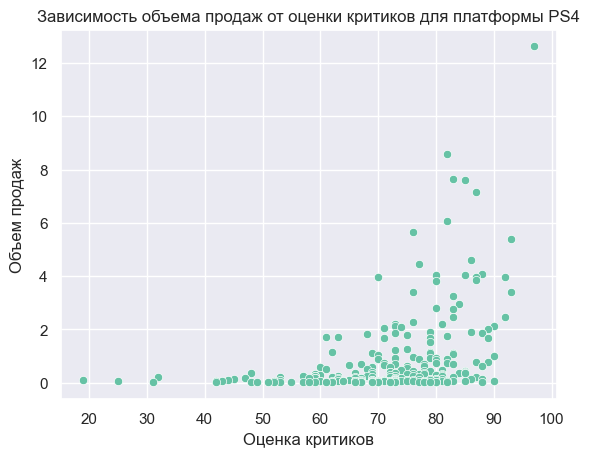

Коэффициент корреляции между столбцами critic_score и all_region_sales: 0.4026614106810408


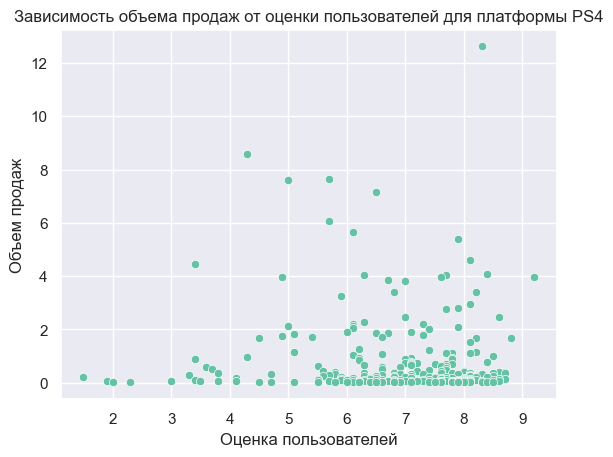

Коэффициент корреляции между столбцами user_score и all_region_sales: -0.040131589472697266


In [40]:
data_score_ps4 = data_actual[data_actual['platform'] == 'PS4']

score_influence(data_score_ps4, 'PS4')

Видно, что при более высокой оценке критиков, объемы продаж также увеличиваются. Эта зависимость вполне логична, поскольку высокая оценка может свидетельствовать о более качественном продукте и тем самым привлекать большую аудиторию среди геймеров. Расчетный коэффициент корреляции также указывает на средний уровень взаимосвязи между столбцами `critic_score` и `all_region_sales`.

Нетрудно заметить, что наблюдается прямая зависимость между оценками пользователей и объемом продаж, более высокая оценка свидетельствует о более качественном продукте. Однако, исходя из полученного коэффициента корреляции можно сделать вывод, что корреляции между столбцами `user_score` и `all_region_sales` нет.

##### 3.5.2 Оценка влияния показателей для платформы XOne

Проведем подобный анализ для платформы **XOne** и проанализируем полученные результаты.

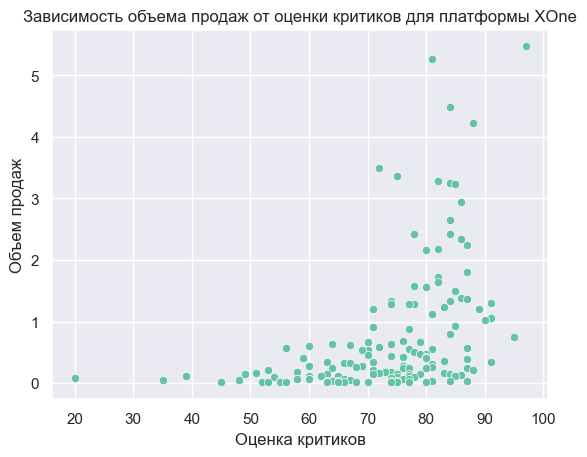

Коэффициент корреляции между столбцами critic_score и all_region_sales: 0.4286769437033318


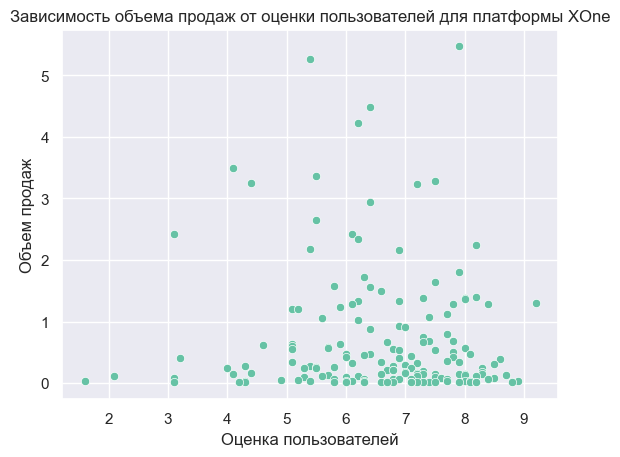

Коэффициент корреляции между столбцами user_score и all_region_sales: -0.0703839280647581


In [41]:
data_score_xone = data_actual[data_actual['platform'] == 'XOne']

score_influence(data_score_xone, 'XOne')

Заметим, что полученные результаты аналогичны показателям для игровой платформы **PS4**, наблюдаются те же закономерности.

##### 3.5.3 Оценка влияния показателей для платформы 3DS

Проведем подобный анализ для платформы **3DS**.

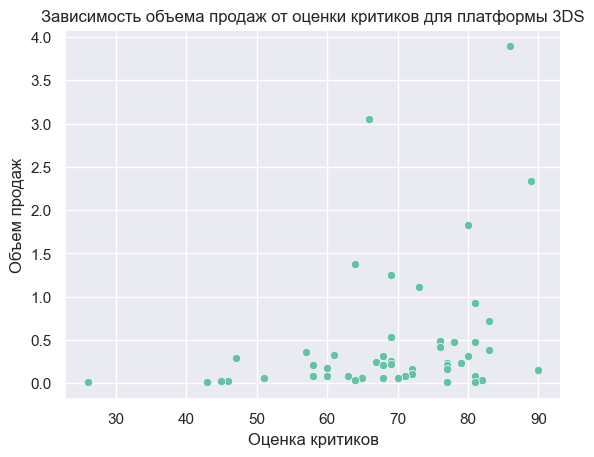

Коэффициент корреляции между столбцами critic_score и all_region_sales: 0.31411749286905094


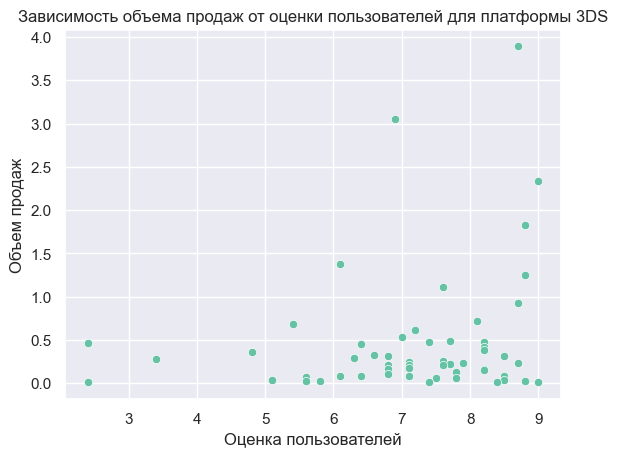

Коэффициент корреляции между столбцами user_score и all_region_sales: 0.2151932718527028


In [42]:
data_score_3ds = data_actual[data_actual['platform'] == '3DS']

score_influence(data_score_3ds, '3DS')

Для игровой платформы **3DS** наблюдаются немного другие показатели: помимо средней корреляции столбцов `critic_score` и `all_region_sales`, также можно заметить слабую корреляцию между `user_score` и `all_region_sales`.

##### 3.5.4 Оценка влияния показателей для платформы PS3

Рассмотрим данные показатели для платформы PS3.

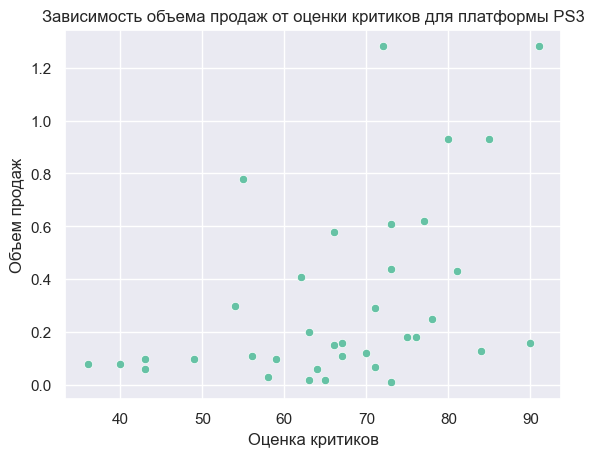

Коэффициент корреляции между столбцами critic_score и all_region_sales: 0.44657460493190715


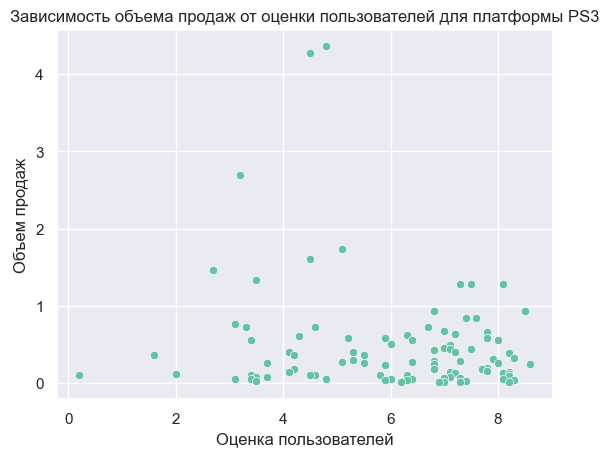

Коэффициент корреляции между столбцами user_score и all_region_sales: -0.16676141347662105


In [43]:
data_score_ps3 = data_actual[data_actual['platform'] == 'PS3']

score_influence(data_score_ps3, 'PS3')

Заметим, что для данной игровой платформы также наблюдается средний уровень корреляции между столбцами `critic_score` и `all_region_sales`.

##### 3.5.5 Оценка влияния показателей для платформы X360

И рассмотрим пятую по популярности игровую платформу – **X360**, рассмотрим для нее влияние этих показателей на объем продаж.

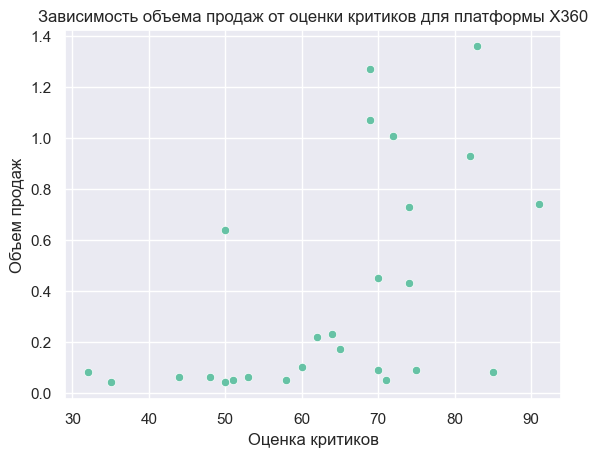

Коэффициент корреляции между столбцами critic_score и all_region_sales: 0.5257228356581523


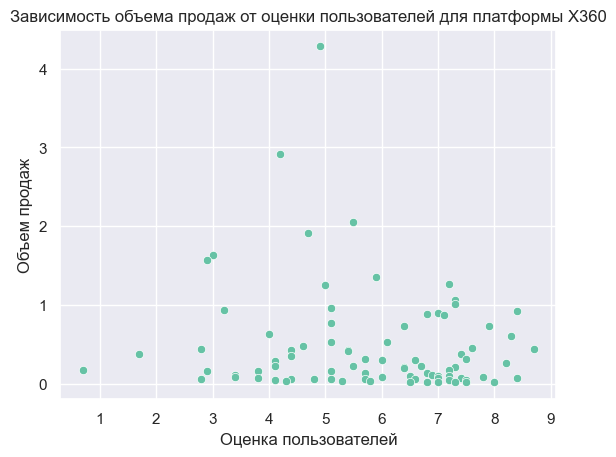

Коэффициент корреляции между столбцами user_score и all_region_sales: -0.13844457094566506


In [44]:
data_score_x360 = data_actual[data_actual['platform'] == 'X360']

score_influence(data_score_x360, 'X360')

Таким образом, на основании проведенного анализа можно сделать следующий **вывод**:

Как для игровых платформ **PS4**, **XOne**, **PS3**, так и для **X360** наблюдается средний уровень корреляции между оценками критиков и объемом продаж игр. Взаимосвязь между `user_score` и `all_region_sales` имеет слабый характер, либо полностью отсутствует.

#### 3.6 Оценка влияния жанра игры на объем продаж

В данном разделе оценим объемы продаж игр для разных жанров. Для рассмотрения будем использовать актуальные данные за последние 3 года.

Построим сводную таблицу, в которой будут отражены суммарные и медианные значения по продажам для каждого жанра.

In [45]:
data_actual_genre = data_actual.pivot_table(index='genre', values='all_region_sales', aggfunc={'sum', 'median'}).sort_values('median', ascending=False)
data_actual_genre.columns = ['Медианное значение', 'Cуммарные продажи']

data_actual_genre

,Медианное значение,Cуммарные продажи
genre,,
Shooter,0.515,170.94
Sports,0.180,109.48
Platform,0.140,18.09
Fighting,0.125,28.22
Role-Playing,0.110,101.44
Simulation,0.100,13.13
Action,0.090,199.36
Misc,0.090,37.55
Racing,0.090,27.52


При оценке прибыльности жанров будем рассматривать медианные значения, поскольку они менее подвержены влиянию выбросов и являются наиболее объективным показателем.

В данном случае заметим, что наиболее прибыльными являются жанры **Shooter** и **Sports** с внушительными показателями по суммарным продажам. Наименее прибыльными являются жанры **Adventure** и **Puzzle**.

Также дополнительно визуализируем полученные результаты, построим график типа **pie**.

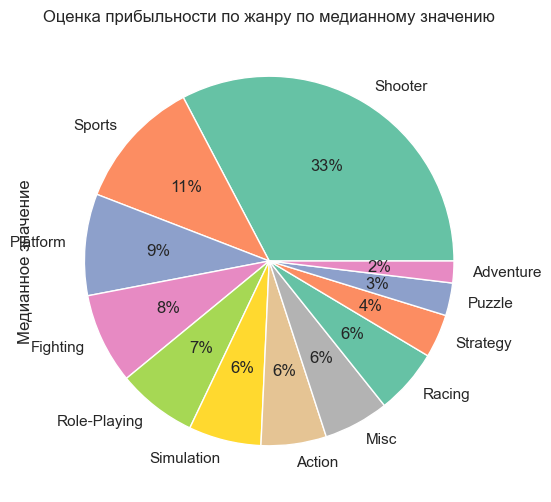

In [46]:
data_actual_genre.plot(kind='pie', y='Медианное значение', figsize=(11,6), autopct='%1.0f%%', legend=False)
plt.title('Оценка прибыльности по жанру по медианному значению');

**Вывод:**

Был произведен исследовательский анализ и определены основные факторы, влияющие на объем продаж по играм. В ходе проведения анализа был выбран период для более точной оценки факторов, актуальных для текущего момента времени (3 года). Были выявлены следующие зависимости:

- Выбор игровой платформы оказывает сильное влияние на уровень продаж. Наиболее прибыльными являются платформы *PS4* и *XOne*;
- Оценки критиков также напрямую влияют на уровень продаж игр: чем выше оценка критиков, тем вероятнее то, что игра продастся в больших объемах;
- Игровой жанр тоже является важным фактором, влияющим на уровень продаж. Самыми прибыльными явлются *Shooter* и *Sports*.

### 4. Портрет пользователя каждого региона

---

Составим портрет типичного пользователя для каждого региона (*NA*, *EU*, *JP*). Найдем самые популярные игровые платформы для каждого региона (топ-5) и самые популярные жанры (топ-5). Анализ будем проводить по актуальным данным за последние 3 года.

#### 4.1 Распределение по выбору игровой платформы для пользователей из разных регионов

Сперва рассмотрим популярные игровые платформы для каждого региона. Ориентироваться будем на топ-5 платформ (*PS4*, *XOne*, *3DS*, *PS3*, *X360*), а остальные платформы запишем в категорию *Other*.

In [47]:
data_portrait_platform = data_actual
top_5 = data_actual.groupby('platform').agg({'all_region_sales': 'sum'}).sort_values(by='all_region_sales', ascending=False).head(5).index.to_list()

for value in data_actual['platform'].unique():
    if (value not in top_5):
        data_portrait_platform = data_portrait_platform.replace(value, 'Other')

In [48]:
data_actual.groupby('platform').agg({'all_region_sales': 'sum'}).sort_values(by='all_region_sales', ascending=False).head(5).index.to_list()

['PS4', 'XOne', '3DS', 'PS3', 'X360']

И построим круговые диаграммы для каждого региона (типа **pie**).

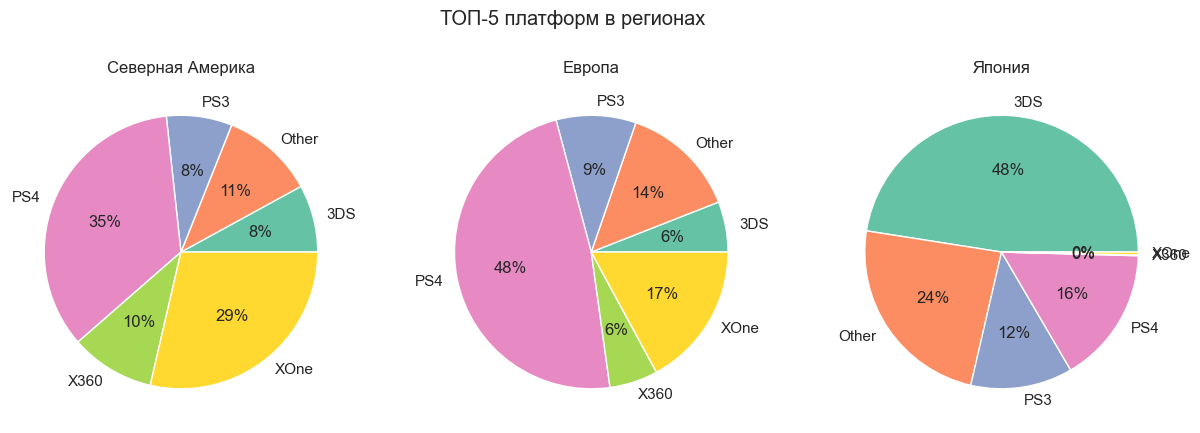

In [49]:
table_portrait_platform = data_portrait_platform.pivot_table(index='platform', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc={'sum'})

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
fig.suptitle('ТОП-5 платформ в регионах')

table_portrait_platform.plot(kind='pie', y='na_sales', autopct='%1.0f%%', legend=False, ax=axs[0])
axs[0].set_ylabel(None)
axs[0].set_title('Северная Америка')

table_portrait_platform.plot(kind='pie', y='eu_sales', autopct='%1.0f%%', legend=False, ax=axs[1])
axs[1].set_ylabel(None)
axs[1].set_title('Европа')

table_portrait_platform.plot(kind='pie', y='jp_sales', autopct='%1.0f%%', legend=False, ax=axs[2])
axs[2].set_ylabel(None)
axs[2].set_title('Япония');

На основании полученных круговых диаграмм можно сделать следующие выводы:

- Для региона **EU** наибольший процент продаж игр приходится для платформы *PS4*, далее следует ее прямой конкурент *XOne* и замыкает тройку категория *Other*.

- Для региона **JP** наибольший процент продаж игр приходится для платформы *3DS*, далее следует категория *Other* и замыкает тройку *PS4*.

- Для региона **NA** наибольший процент продаж игр приходится для платформы *PS4*, далее следует ее прямой конкурент *XOne* и замыкает тройку категория *Other*.

Заметим также следующие особенности:

- Для каждого региона платформа *PS4* входит в топ-3.

- Показатели продаж для регионов **EU** и **NA** имеют похожие значения для всех платформ.

- Для региона **JP** сильно выделяется платформа *3DS*.

#### 4.2 Распределение по выбору жанра для пользователей из разных регионов

Проведем такой же анализ по самым популярным жанрам по регионам и построим круговые диаграммы для более наглядного представления результатов.

Выделим также топ-5 жанров, а остальные запишем в категорию *Other*.

In [50]:
data_portrait_genre = data_actual
top_5 = data_actual.groupby('genre').agg({'all_region_sales': 'sum'}).sort_values(by='all_region_sales', ascending=False).head(5).index.to_list()

for value in data_actual['genre'].unique():
    if (value not in top_5):
        data_portrait_genre = data_portrait_genre.replace(value, 'Other')

И построим круговые диаграммы.

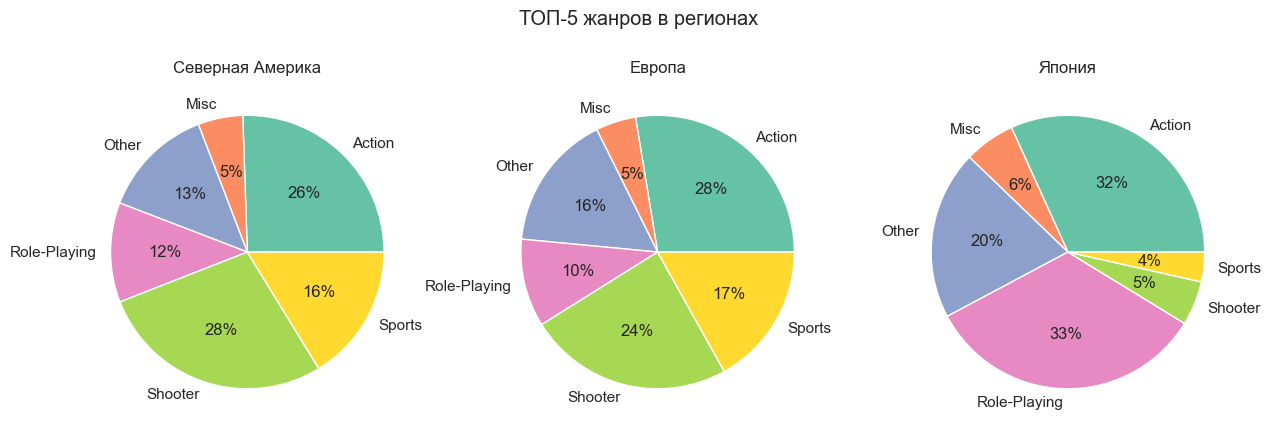

In [51]:
table_portrait_genre = data_portrait_genre.pivot_table(index='genre', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc={'sum'})

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
fig.suptitle('ТОП-5 жанров в регионах')

table_portrait_genre.plot(kind='pie', y='na_sales', autopct='%1.0f%%', legend=False, ax=axs[0])
axs[0].set_ylabel(None)
axs[0].set_title('Северная Америка')

table_portrait_genre.plot(kind='pie', y='eu_sales', autopct='%1.0f%%', legend=False, ax=axs[1])
axs[1].set_ylabel(None)
axs[1].set_title('Европа')

table_portrait_genre.plot(kind='pie', y='jp_sales', autopct='%1.0f%%', legend=False, ax=axs[2])
axs[2].set_ylabel(None)
axs[2].set_title('Япония');

На основании полученных круговых диаграмм можно сделать следующие выводы:

- Для региона **EU** наибольший процент продаж игр приходится для жанров *Action* и *Shooter*, далее следует жанр *Sports* и категория *Other*.

- Для региона **JP** наибольший процент продаж игр приходится для жанров *Role-Playing* и *Action*, далее следует категория *Other*.

- Для региона **NA** наибольший процент продаж игр приходится для жанров *Action* и *Shooter*, далее следуют категории *Sports*, *Other* и *Role-Playing*.

Также обратим внимание на схожесть по процентам продаж по жанрам для регионов **EU** и **NA**.

#### 4.3 Оценка влияния рейтинга ESRB на продажи по регионам

Дополнительно проведем оценку влияния рейтинга ESRB (Entertainment Software Rating Board) на показатели по продажам для регионов.

Заполним пропуски в данных для столбца `rating` значением *Missing*.

In [52]:
data_actual['rating'] = data_actual['rating'].fillna('Missing')

Построим круговые диаграммы для каждого региона.

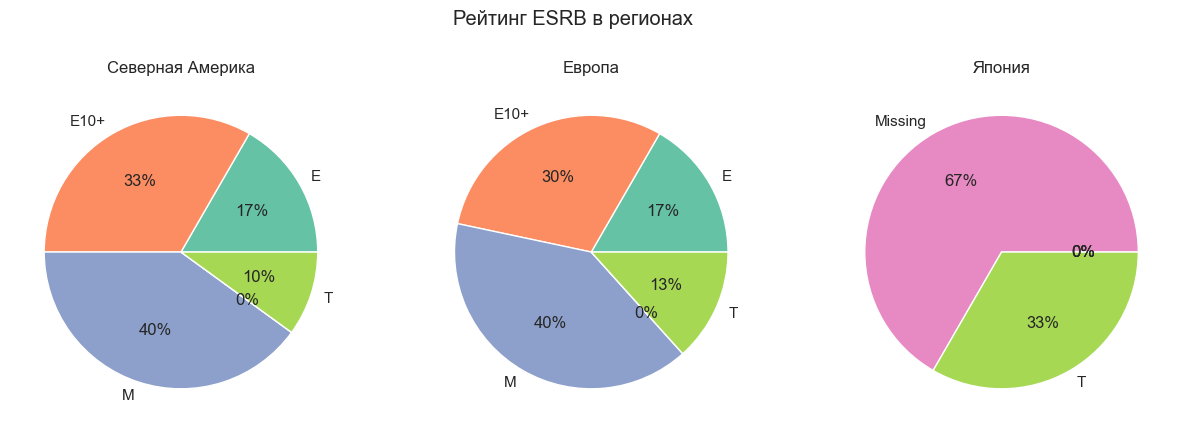

In [53]:
table_actual_rating = data_actual.pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc={'median'})

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
fig.suptitle('Рейтинг ESRB в регионах')

table_actual_rating.plot(kind='pie', y='na_sales', autopct='%1.0f%%', legend=False, ax=axs[0])
axs[0].set_ylabel(None)
axs[0].set_title('Северная Америка')

table_actual_rating.plot(kind='pie', y='eu_sales', autopct='%1.0f%%', legend=False, ax=axs[1])
axs[1].set_ylabel(None)
axs[1].set_title('Европа')

table_actual_rating.plot(kind='pie', y='jp_sales', autopct='%1.0f%%', legend=False, ax=axs[2])
axs[2].set_ylabel(None)
axs[2].set_title('Япония');

Для регионов **EU** и **NA** игры с рейтингом *M* в среднем имеют большие продажи, нежели чем игры с другим рейтингом. Также можно заметить некую закономерность в уменьшении среднего значения объема продаж при следующем расположении рейтингов: *M*, *E10+*, *E*, *T*.

Однако для региона **JP** наблюдается интересная закономерность: большая часть показателей рейтинга имеет пропущенные значения, а оставшиеся значения имеют рейтинг *T*.

**Вывод:**

- Для каждого региона наблюдается разная картина по предпочтениям в игровой платформе и в игровых жанрах. Наблюдается сходство в предпочтениях для регионов NA и EU (платформа – PS4 и Xbox One, жанр – Action и Shooter), в то время как для региона JP характерны другие показатели (платформа – 3DS и PS4, жанр – Role-Playing и Action);
- Рейтинг ESRB также оказывает влияние на продажи. При расположении рейтингов в следующем порядке (M, E10+, E, T) для региона EU наблюдается постепенное уменьшение объема продаж.

### 5. Проверка гипотез

---

В текущем разделе проверим поставленные гипотезы для датафрейма с актуальными данными о продажах за последние 3 года.

#### 5.1 Средние пользовательские рейтинги платформ Xbox One и PC

Произведем проверку следующей гипотезы: **Средние пользовательские рейтинги платформ Xbox One и PC одинаковые**.

H0: *Средние пользовательские рейтинги платформ Xbox One и PC одинаковые*

H1: *Средние пользовательские рейтинги платформ Xbox One и PC не равны*

In [54]:
data_xbox = data_actual[data_actual['platform'] == 'XOne']['user_score']
data_pc = data_actual[data_actual['platform'] == 'PC']['user_score']

alpha = 0.05

results = st.ttest_ind(data_xbox, data_pc, equal_var=False, nan_policy='omit')

print('Значение p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Значение p-value: 0.11601398086668943
Не получилось отвергнуть нулевую гипотезу


При заданнном уровне критической значимости в **0.05** нулевую гипотезу отвергнуть не получилось. C большой долей вероятности средние пользовательские рейтинги платформ *XOne* и *PC* не имеют статистически значимых отличий.

#### 5.2 Средние пользовательские рейтинги жанров Action и Sports

Произведем проверку следующей гипотезы: **Средние пользовательские рейтинги жанров Action и Sports одинаковые**.

H0: *Средние пользовательские рейтинги жанров Action и Sports одинаковые*

H1: *Средние пользовательские рейтинги жанров Action и Sports не равны*

In [55]:
data_action = data_actual[data_actual['genre'] == 'Action']['user_score']
data_sports = data_actual[data_actual['genre'] == 'Sports']['user_score']

alpha = 0.05

results = st.ttest_ind(data_action, data_sports, equal_var=False, nan_policy='omit')

print('Значение p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Значение p-value: 1.182555038264477e-14
Отвергаем нулевую гипотезу


Поскольку значение величины статистической значимости меньше критического уровня статистической значимости, то средние пользовательские рейтинги жанров *Action* и *Sports* разные. С большой долей вероятности средние пользовательские рейтинги жанров *Action* и *Sports* имеют статистически значимые отличия.

При формулировании гипотез H0 необходимо было приравнять интересующие данные или столбцы, а гиптозы H1 соответственно должны быть не равны интересующим значениям. Обе гипотезы формировались исходя из того, что необходимо использовать знак равенства.

Для проверки гипотез был применен критерий критического значения выбранного уровня значимости. Если наблюдаемое на выборке значение оказывается в этом интервале, то вероятность такого события признается очень малой, и имеются основания для отказа от нулевой гипотезы. Если же значение попадает в зону «Не отвергаем H₀», то оснований отвергать нулевую гипотезу нет. Считаем, что полученные данные не противоречат нулевой гипотезе.

**Вывод:**

В данном разделе были проверены две гипотезы, одна из которых была отвергнута (*Средние пользовательские рейтинги жанров Action и Sports одинаковые*), а другую отвергнуть не удалось (*Средние пользовательские рейтинги платформ Xbox One и PC одинаковые*).

### Общий вывод

---

В данной работе были проанализированы данные об объемах продаж игр. На этапе предобработки данных были преобразованы названия столбцов, обработаны пропуски в данных, изменены типы данных там, где это было необходимо, обработаны явные и неявные дубликаты, а также был добавлен информативный столбец к исходному датасету. Для более точной оценки и предсказания продаж на следующий год, были взяты актуальные данные по продажам за последние 3 года. Необходимо было выявить основные закономерности, влияющие на успешность игры по продажам. Среди них были рассмотрены:

- игровая платформа;
- жанр;
- оценки пользователей и критиков;
- регион продаж;
- рейтинг ESRB.

Было выявлено, что

1. Одним из основных факторов, влияющих на объемы продаж, является игровая платформа. Наиболее популярными и потенциально прибыльными платформами в последнее время являются PS4, Xbox One и PC;
2. Жанры Shooter и Sports являются наиболее прибыльными по сравнению с остальными;
3. Взаимосвязь между оценками критиков и объемом продаж по играм имеют прямую зависимость и средней уровень корреляции;
4. Для каждого региона наблюдается разная картина по предпочтениям в игровой платформе и в игровых жанрах. Наблюдается сходство в предпочтениях для регионов NA и EU (платформа – PS4 и Xbox One, жанр – Action и Shooter), в то время как для региона JP характерны другие показатели (платформа – 3DS и PS4, жанр – Role-Playing и Action);
5. Рейтинг ESRB также оказывает влияние на продажи. Для регионов EU и NA при расположении рейтингов в следующем порядке (M, E10+, E, T) наблюдается постепенное уменьшение объема продаж.

Дополнительно были проверены две гипотезы:

- Гипотезу "*Средние пользовательские рейтинги платформ Xbox One и PC одинаковые*" отвергнуть не получилось (с большой долей вероятности средние пользовательские рейтинги платформ *XOne* и *PC* не имеют статистически значимых отличий);
- Гипотеза "*Средние пользовательские рейтинги жанров Action и Sports одинаковые*" была отвергнута (с большой долей вероятности средние пользовательские рейтинги жанров *Action* и *Sports* имеют статистически значимые отличия).

Для более подробного изучения датафрейма и поиска новых параметров, влияющих на объемы продаж по играм, рекомендуется заполнить пропуски в столбцах, показывающие оценки критиков, пользователей и рейтинга ESRB для региона JP, которые позволят уточнить результаты проведенного анализа.